# World Happiness Report Project

1. First we will import all the nesseary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle   #for data loading
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

2. Now will load the Dataset which saved in notebook as in CSV Format

In [6]:
df = pd.read_csv("word_happiness.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
#Lets check the top 5 columsn

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
#Lets chech how many Row and Cokumns in Dataset


print('Number of Rows =', df.shape[0],'  &  ',
      'Number of Columns =', df.shape[1]) 

Number of Rows = 158   &   Number of Columns = 12


In [14]:
#Renaming the Columns Name and Saving it as Default by inplace

df.rename(columns={'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score','Standard Error':'Standard_Error','Economy (GDP per Capita)':'Economy_GDP_per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Dystopia Residual':'Dystopia_Residual'}, inplace=True)


In [16]:
#Checking the Random Rows of DataSet

df.sample(7)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
126,Armenia,Central and Eastern Europe,127,4.350,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


# EDA (Exploratory Data Analysis)

In [17]:
#Details of Dataset rows and Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      158 non-null    object 
 1   Region                       158 non-null    object 
 2   Happiness_Rank               158 non-null    int64  
 3   Happiness_Score              158 non-null    float64
 4   Standard_Error               158 non-null    float64
 5   Economy_GDP_per_Capita       158 non-null    float64
 6   Family                       158 non-null    float64
 7   Health_Life_Expectancy       158 non-null    float64
 8   Freedom                      158 non-null    float64
 9   Trust_Government_Corruption  158 non-null    float64
 10  Generosity                   158 non-null    float64
 11  Dystopia_Residual            158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Observation on Dataset

1.No NULL Values in Dataset

2.Obj, float and int (3) data type are present

In [19]:
#Number of Unique Values in Dataset

df.nunique()

Country                        158
Region                          10
Happiness_Rank                 157
Happiness_Score                157
Standard_Error                 153
Economy_GDP_per_Capita         158
Family                         158
Health_Life_Expectancy         157
Freedom                        158
Trust_Government_Corruption    157
Generosity                     158
Dystopia_Residual              158
dtype: int64

In [45]:
# General statistical description of Numerical variables
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation:
    
    
1. Dataset consist of 158 Countries and happiness rank is determine from 1 to 158

2. Happniess score is from 2.839000 to 7.587000 and mean score of happiness is 5.375734

3. Standard error is from 0.018480 to 0.136930 and mean standard error is 0.047885

4. Here all columns are one of the factor for happiness for considering the min max and mean will check for all critera

5. Economy GDP per capita from 0 to 1.690420 with mean of 0.846137

6. The Family column is from 0 to 1.40223, with a mean of 0.991046. 

7. The Health (Life Expectancy) column is from 0 to 1.02525, with a mean of 0.630259.

8. The Freedom is from 0 to 0.66973, with a mean of 0.428615. 

9. The Trust (Government Corruption) is from 0 to 0.55191, with a mean of 0.143422. 

10. The Generosity is from 0 to 0.79588, with a mean of 0.237296. 

11. The Dystopia Residual column ranges from 0.32858 to 3.60214, with a mean of 2.098977. It represents the extent to which the happiness score is influenced by factors not included in the dataset.

In [ ]:
#Cummilative Duplicate Values in Dataset

print("There are", df.duplicated().sum(),"duplicates present in the dataset")


Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64


<Axes: >

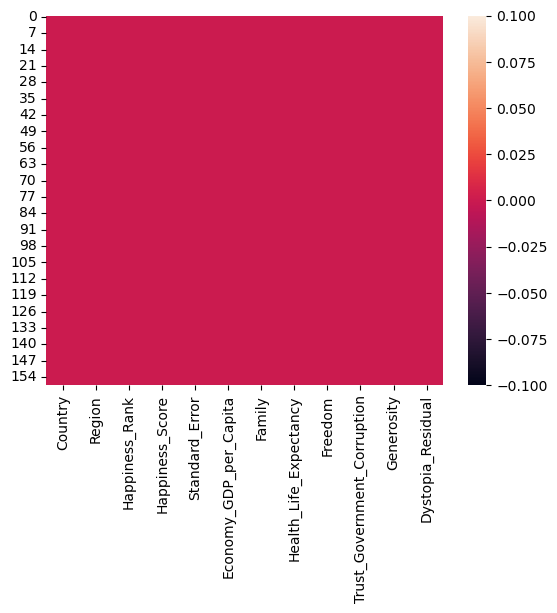

In [31]:
#NULL value check in data set both stat and Visual

print(df.isnull().sum())


sns.heatmap(df.isnull())

Observation:
    
1.No Null values are present

In [40]:
#Seperating the Numerical and Categorial data by Column header using tolist.

numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
Categorial_columns=df.select_dtypes(include=['object']).columns.tolist()

In [42]:
print('Numerical columns : ',numerical_columns)

print('Categoriual columns :',Categorial_columns)


Numerical columns :  ['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']
Categoriual columns : ['Country', 'Region']


In [43]:
#Value counts of Country

df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [44]:
#Value counts of Region

df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [50]:
#create a list to store the predict happiness category  

happiness=[]

for HappyScore in df['Happiness_Score']:
    if HappyScore <4:
        happiness.append('Unhappy')
    elif HappyScore >=4 and HappyScore <=6:
        happiness.append('Normal')
    else:
        happiness.append('Happy')

pred_happiness=pd.DataFrame(happiness, columns=['Predicted_Happiness'])
pred_happiness=pred_happiness.astype('category')
data=pd.concat([df,pred_happiness],axis=1)

In [52]:
#New data set with Additional of Prediction of Happiness

data

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Predicted_Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Unhappy
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Unhappy
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Unhappy
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Unhappy


In [54]:
#Value counts of Pred Happiness

data['Predicted_Happiness'].value_counts()

Normal     93
Happy      44
Unhappy    21
Name: Predicted_Happiness, dtype: int64

In [65]:
#Top 3 appy Countries

Happy_Countries=data.sort_values('Happiness_Score', ascending=False).head(3)
Happy_Countries

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Predicted_Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy


In [63]:
#Bottom 3 Happy Countries

last_Happy_Countries=data.sort_values('Happiness_Score', ascending=False).tail(3)
last_Happy_Countries

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Predicted_Happiness
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Unhappy
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Unhappy
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,Unhappy


Observation:
    
1. Switzerland is the Happiest Country inh the world

2. Togo is the lowest Happinest/ Unhappiest Country in the world

In [66]:
#Dropping of Column

#Some columns usually the Categorical which is not used for prediction of the data,so some column are being removed here
#Region,Happiness Rank, Country and Predicted_Happiness are removed



data=data.drop(['Country','Region','Happiness_Rank','Predicted_Happiness'],axis=1)
data

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Checking of Skewness

In [67]:
#Checking the Skewness of Dataset


data.skew()

Happiness_Score                0.097769
Standard_Error                 1.983439
Economy_GDP_per_Capita        -0.317575
Family                        -1.006893
Health_Life_Expectancy        -0.705328
Freedom                       -0.413462
Trust_Government_Corruption    1.385463
Generosity                     1.001961
Dystopia_Residual             -0.238911
dtype: float64

Observation:
    
1.Happiness_Score: The skewness value of 0.097769 suggests a slightly positive skewness, indicating a slightly longer right tail.
    
2.Standard_Error: The skewness value of 1.983439 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

3.Economy_GDP_per_Capita: The skewness value of -0.317575 suggests a slightly negative skewness, indicating a slightly longer left tail.

4.Family: The skewness value of -1.006893 indicates a significant negative skewness, suggesting a long left tail and a concentration of higher values.

5.Health_Life_Expectancy: The skewness value of -0.705328 indicates a negative skewness, suggesting a longer left tail.

6.Freedom: The skewness value of -0.413462 suggests a slightly negative skewness, indicating a slightly longer left tail.

7.Trust_Government_Corruption: The skewness value of 1.385463 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

8.Generosity: The skewness value of 1.001961 suggests a positive skewness, indicating a longer right tail.

9.Dystopia_Residual: The skewness value of -0.238911 suggests a slightly negative skewness, indicating a slightly longer left tail.

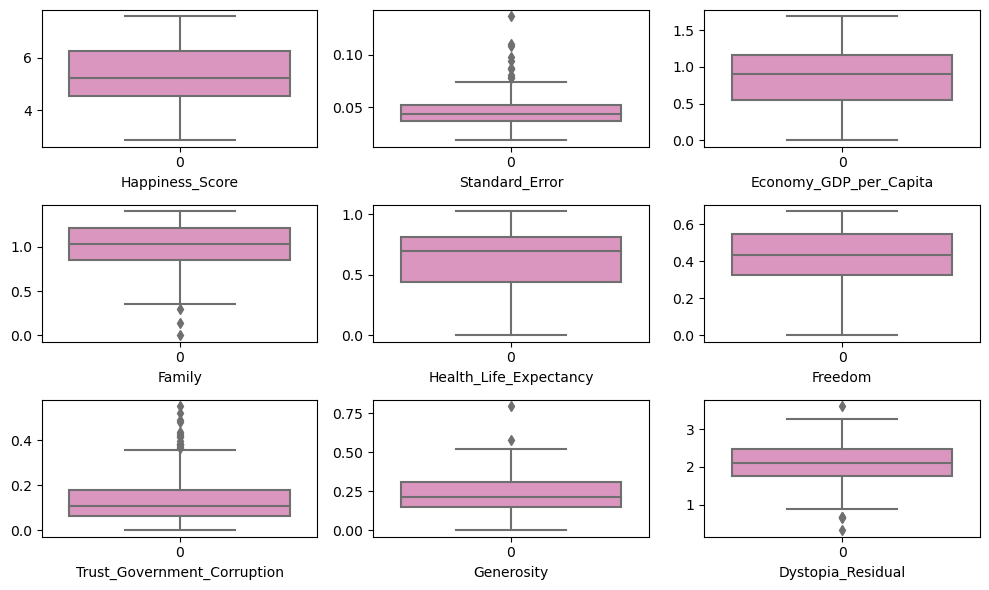

In [71]:
#Checking of Outliers in dataset with Box plots

plt.figure(figsize=(10,6),facecolor='white')

plotnumber=1

for col in data.columns:
    if plotnumber<=9:   #because of 9 column in data set
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],palette='Set2_r')
        plt.xlabel(col,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observation:
    
Outliers are present in dataset

In [72]:
#Removing of Outliers

#using Z Score for removing of Outliers

ZScore=np.abs(zscore(data))
threshold=3
np.where(ZScore>3)


data1=data[(ZScore<3).all(axis=1)]
data1

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Observation:
    
    
1. We have removed the outliers from data set , which we can now use it data loss while comparing it with no of columns

In [74]:
#Percentage of Data Loss   (before 158 columns and After 148 columns)

data_loss=(158-149)/158*100 
data_loss


#this much of data is lost after louliers are being removed from dataset

5.69620253164557

In [75]:
#data1 is the DATASET which we use use for further as it is a cleaned dataset

# Checking Correlation

In [76]:
data1.corr()

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard_Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy_GDP_per_Capita,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health_Life_Expectancy,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust_Government_Corruption,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia_Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

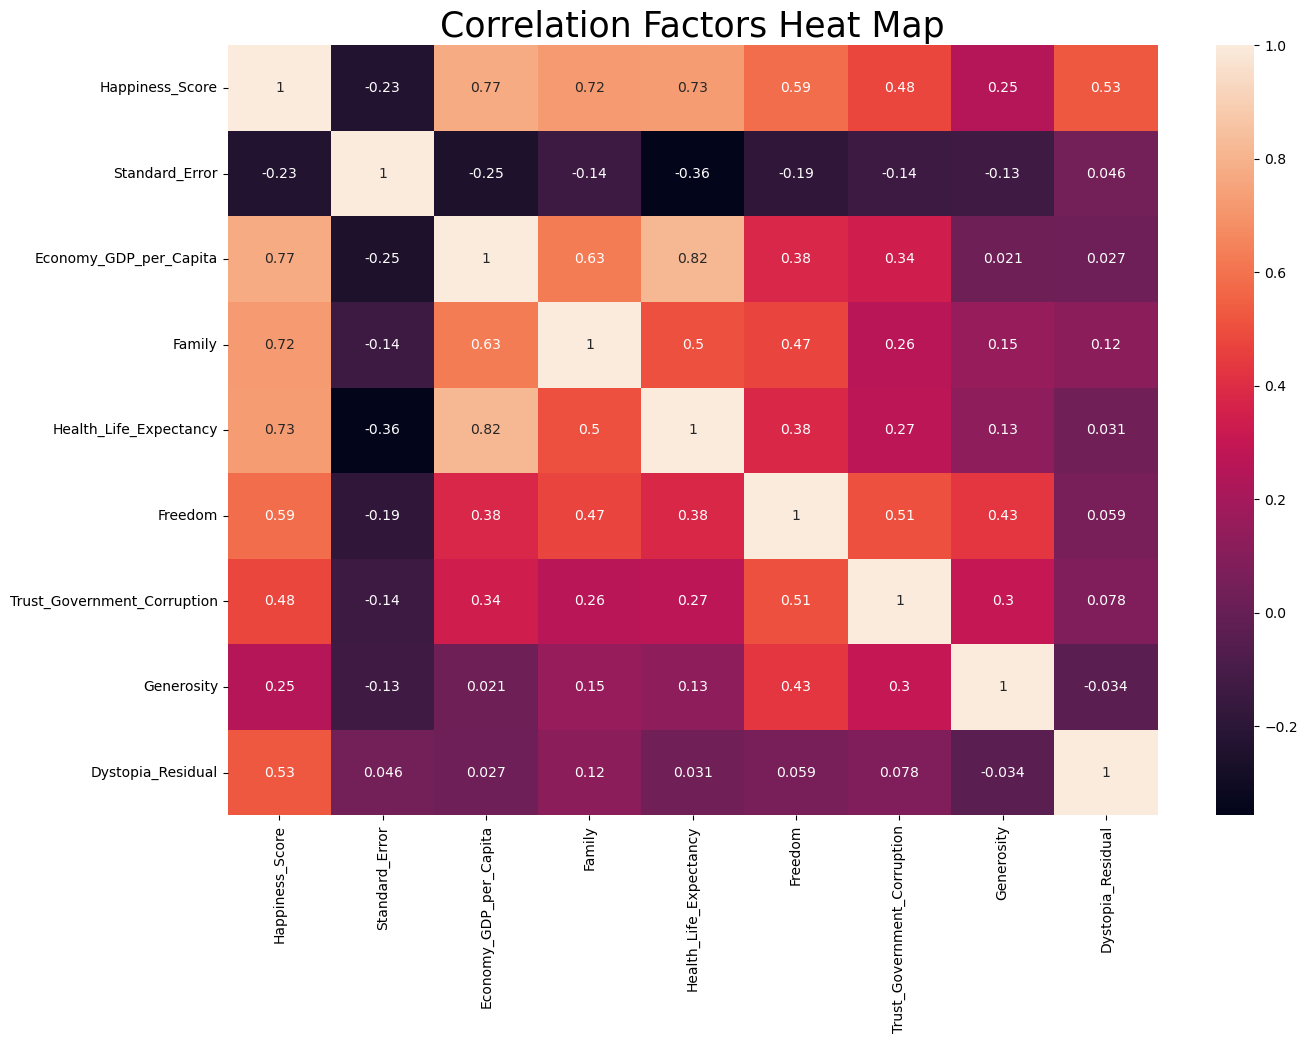

In [88]:
#plot the Correlation with heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot = True).set_title('Correlation Factors Heat Map', size = '25')


In [89]:
correlation_with_label = data1.corr()['Happiness_Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness_Score                1.000000
Economy_GDP_per_Capita         0.773577
Health_Life_Expectancy         0.729191
Family                         0.720868
Freedom                        0.585066
Dystopia_Residual              0.528334
Trust_Government_Corruption    0.477692
Generosity                     0.250903
Standard_Error                 0.230252
Name: Happiness_Score, dtype: float64


# Spliting into features and label

In [95]:

X= data1.drop('Happiness_Score',axis=1) #list of all features/dependent value

Y= data1['Happiness_Score'] #Data of our label/Target

In [91]:
X


,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [92]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness_Score, Length: 149, dtype: float64

In [96]:
#Feature Scaling

Scaler= StandardScaler()
X=pd.DataFrame(Scaler.fit_transform(X),columns=X.columns)
X

,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


In [101]:
#Checking the Randonn State

maxR2_Score=0
maxRS=0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(X_train,Y_train)
    Y_pred=gb.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    if R2>maxR2_Score:
        maxR2_Score=R2
        maxRS=i
print('Best Accuracy is',maxR2_Score,'On Random State',maxRS)

Best Accuracy is 0.9627397420552941 On Random State 37


# Train test split


In [103]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=37)

# Model Training and Testing

In [105]:
#Linear Regression

LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
print('R2_Score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_Score 0.9999999464070932
MAE 0.00023825022255950697


In [107]:
#Ridge Regression

R=Ridge(alpha=10)
R.fit(X_train,Y_train)
Y_pred=R.predict(X_test)


print('R2_Score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_Score 0.9971000941568612
MAE 0.058554203670611184


In [109]:
#Lasso Regression

L=Lasso(alpha=0.001)
L.fit(X_train,Y_train)
Y_pred=L.predict(X_test)

print('R2_score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_score 0.9999969103842553
MAE 0.0018873262896554443


In [111]:
#Descision Tree Regressor

DT=DecisionTreeRegressor(max_depth=5)
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
print('Rs_Score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

Rs_Score 0.82785897222746
MAE 0.3878132142857145


In [112]:
#Random Forest Regressor

RF=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.75,
                         max_features=0.75,max_depth=10)

RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)
print('Rs_Score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

Rs_Score 0.912178128945734
MAE 0.30657961111111115


In [115]:
#Extra Tree Regressor

ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=10,
                           bootstrap=True)

ET.fit(X_train,Y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_score 0.912178128945734
MAE 0.30657961111111115


In [116]:
#ADA Boost Regressor

AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,Y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_score 0.912178128945734
MAE 0.30657961111111115


In [117]:
#Gradient Boosting Regressor

GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,Y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_score 0.912178128945734
MAE 0.30657961111111115


In [118]:
#XGB Regressor

XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(X_train,Y_train)
y_pred = XG.predict(X_test)
print('R2_score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2_score 0.912178128945734
MAE 0.30657961111111115


In [121]:
#Cummulate the MAE and Accuracy of all Models


models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)
    results_df_sorted = results_df.sort_values('R2 Score',ascending=False)


results_df_sorted 

,Model,R2 Score,MAE
0,Linear Regression,1.000000,0.000238
2,Lasso,0.999997,0.001887
1,Ridge,0.997100,0.058554
7,Gradient Boosting,0.953498,0.201593
8,XGBoost,0.935640,0.232872
4,Random Forest,0.912178,0.306580
5,Extra Trees,0.908408,0.318170
6,AdaBoost,0.904718,0.320415
3,Decision Tree,0.832320,0.384047


Observation:
    
    
Here Linear Regression, Lasso and Ridge are having the highest accuracy and it looks like overfitted

So Considering the Gradient Boost with Accureacy of 0.953498 is best for prediction

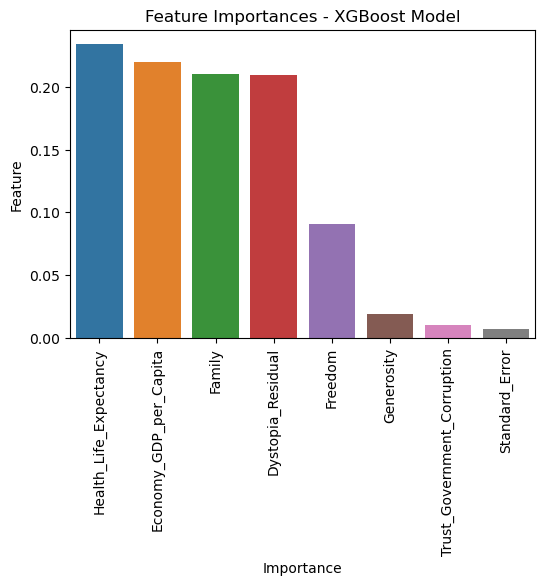

In [122]:
#Feature Importance

GB.fit(X_train, Y_train)

importances = GB.feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Saving the best Model

File_Name= 'Project2_HappyCountry.obj'
pickle.dump(GB, open(filename, 'wb'))